# **Stage 1**

## Understanding the Dataset

*   Dataset pengamatan ini diambil dari sistem biro meteorologi. Sebagian besar data dihasilkan dan ditangani secara otomatis.
*   Dataset ini memaparkan data (145.460 observasi) dalam beberapa tahun (2008-12-01 s/d 2017-07-01) meteorologi di sejumlah lokasi (49) di Australia dengan beberapa parameter (variabel) yang berhubungan seperti temperatur, evaporasi, curah hujan, tekanan udara, kelembapan udara, sinar matahari, awan, dan kecepatan angin.
*   Dari waktu ke waktu, pengamatan tidak akan tersedia, karena berbagai alasan. Kadang-kadang ketika suhu maksimum dan minimum harian, curah hujan atau penguapan hilang, nilai berikutnya yang diberikan telah diakumulasikan selama beberapa hari daripada satu hari normal.
*   Ringkasan statistik (rata-rata, terendah, tertinggi dan total) telah dihitung menggunakan data yang tersedia pada saat persiapan. Statistik hanya akan dihitung jika masuk akal untuk melakukannya (misalnya, "suhu maksimum total" dan "hembusan angin maksimum rata-rata" tidak dihitung, tetapi "curah hujan total" dan "suhu minimum rata-rata" dihitung).
*   Dengan beberapa parameter (variabel) ini kita akan memprediksi target variabel yang mana adalah RainTomorrow (Hujan besok).
*   Tabel memahami data per kolom.
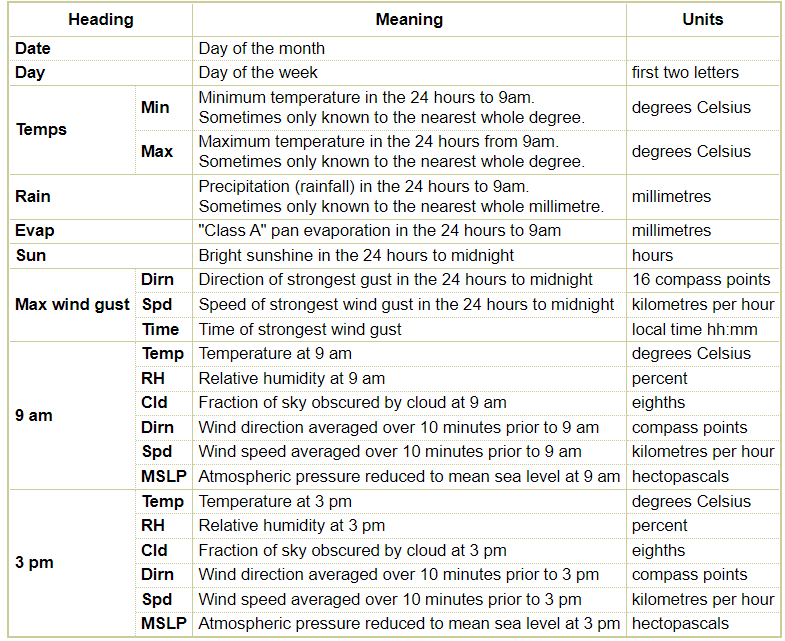

# **Stage 2**

## Identify Which Activities Should be Done

*   melakukan eksplorasi data analisis dan data visualisasi.
*   melakukan pra-proses data
*   membuat model machine learning untuk klasifikasi hujan / prediksi hujan

# **Stage 3**

## Exploratory Data Analysis and Data Visualization




### Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import os

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

### Import Dataset

In [ ]:
SourceFile = 'https://raw.githubusercontent.com/fufundany30/DigitalSkola-Capstone-Project/main/weatherAUS.csv'
df = pd.read_csv(SourceFile)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Info Dataset

In [ ]:
#mendeskripsikan data yang ada pada dataset 
print(df.info())
#mencari nilai statistik penyebaran nya
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

*   Terdapat 16 variabel kontinu diantara nya adalah : MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am dan Temp3pm.
*   Terdapat 6 variabel kategori diantara nya adalah : Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, dan RainTomorrow.
*   Variabel RainTomorrow menjadi target variabel.






In [ ]:
# mencari missing data pada dataset
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data.head(10)

,Total Missing,%
Sunshine,69835,48.0
Evaporation,62790,43.2
Cloud3pm,59358,40.8
Cloud9am,55888,38.4
Pressure9am,15065,10.4
Pressure3pm,15028,10.3
WindDir9am,10566,7.3
WindGustDir,10326,7.1
WindGustSpeed,10263,7.1
Humidity3pm,4507,3.1


Hampir semua variabel memiliki nilai yang hilang kecuali Date dan Location.Top 5 variabel nya antara lain adalah : 
*   Sunshine (48.01%)
*   Evaporation (43.16%)
*   Cloud3pm (40,81%)
*   Cloud9am (38.42%)
*   Pressure9am (10.35%)


### Data Visualization

#### Find the correlation of data

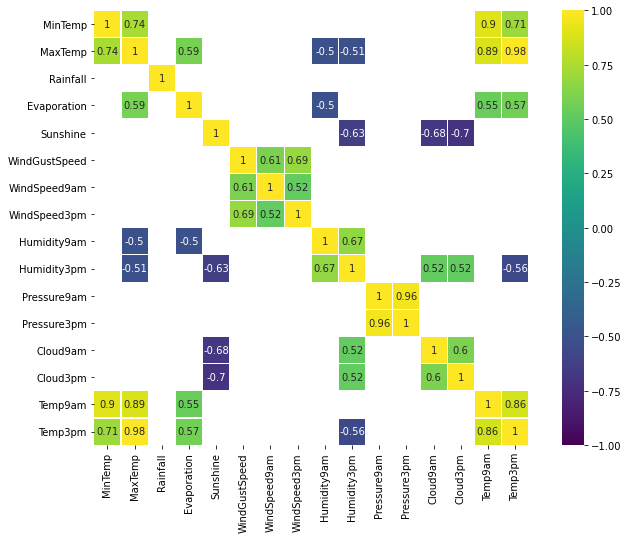

In [ ]:
#Visualisasi cek korelasi menggunakan heatmap pearsonr
corr = df.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

plt.show()

Angka 0 tidak memiliki hubungan sedangkan angka yang mendekati 1 memiliki korelasi yang kuat(positif) dan mendekati -1 memiliki korelasi yang kuat(negatif).

*   Pressure9am and Pressure3pm memiliki korelasi yang kuat (positif).
*   Cloud3pm , Cloud9am dengan Sunshine memiliki korelasi yang kuat (negatif).
*   MinTemp, MaxTemp, Temp9am, Temp3pm memiliki korelasi yang kuat (positif).
*   WindGustSpeed, WindSpeed9am, WindSpeed3pm memilik korelasi yang cukup baik (positif).
*   Cloud9am, Cloud3pm, dengan Humidity3pm memiliki korelasi yang cukup baik (positif).
*   Humidity9am, Humidity3pm, dengan Sunshine memiliki korelasi yang cukup baik (negatif).
*   MaxTemp, Temp9am, Temp3pm dengan Evaporation memilik korelasi yang cukup baik (positif).






<Figure size 864x576 with 0 Axes>

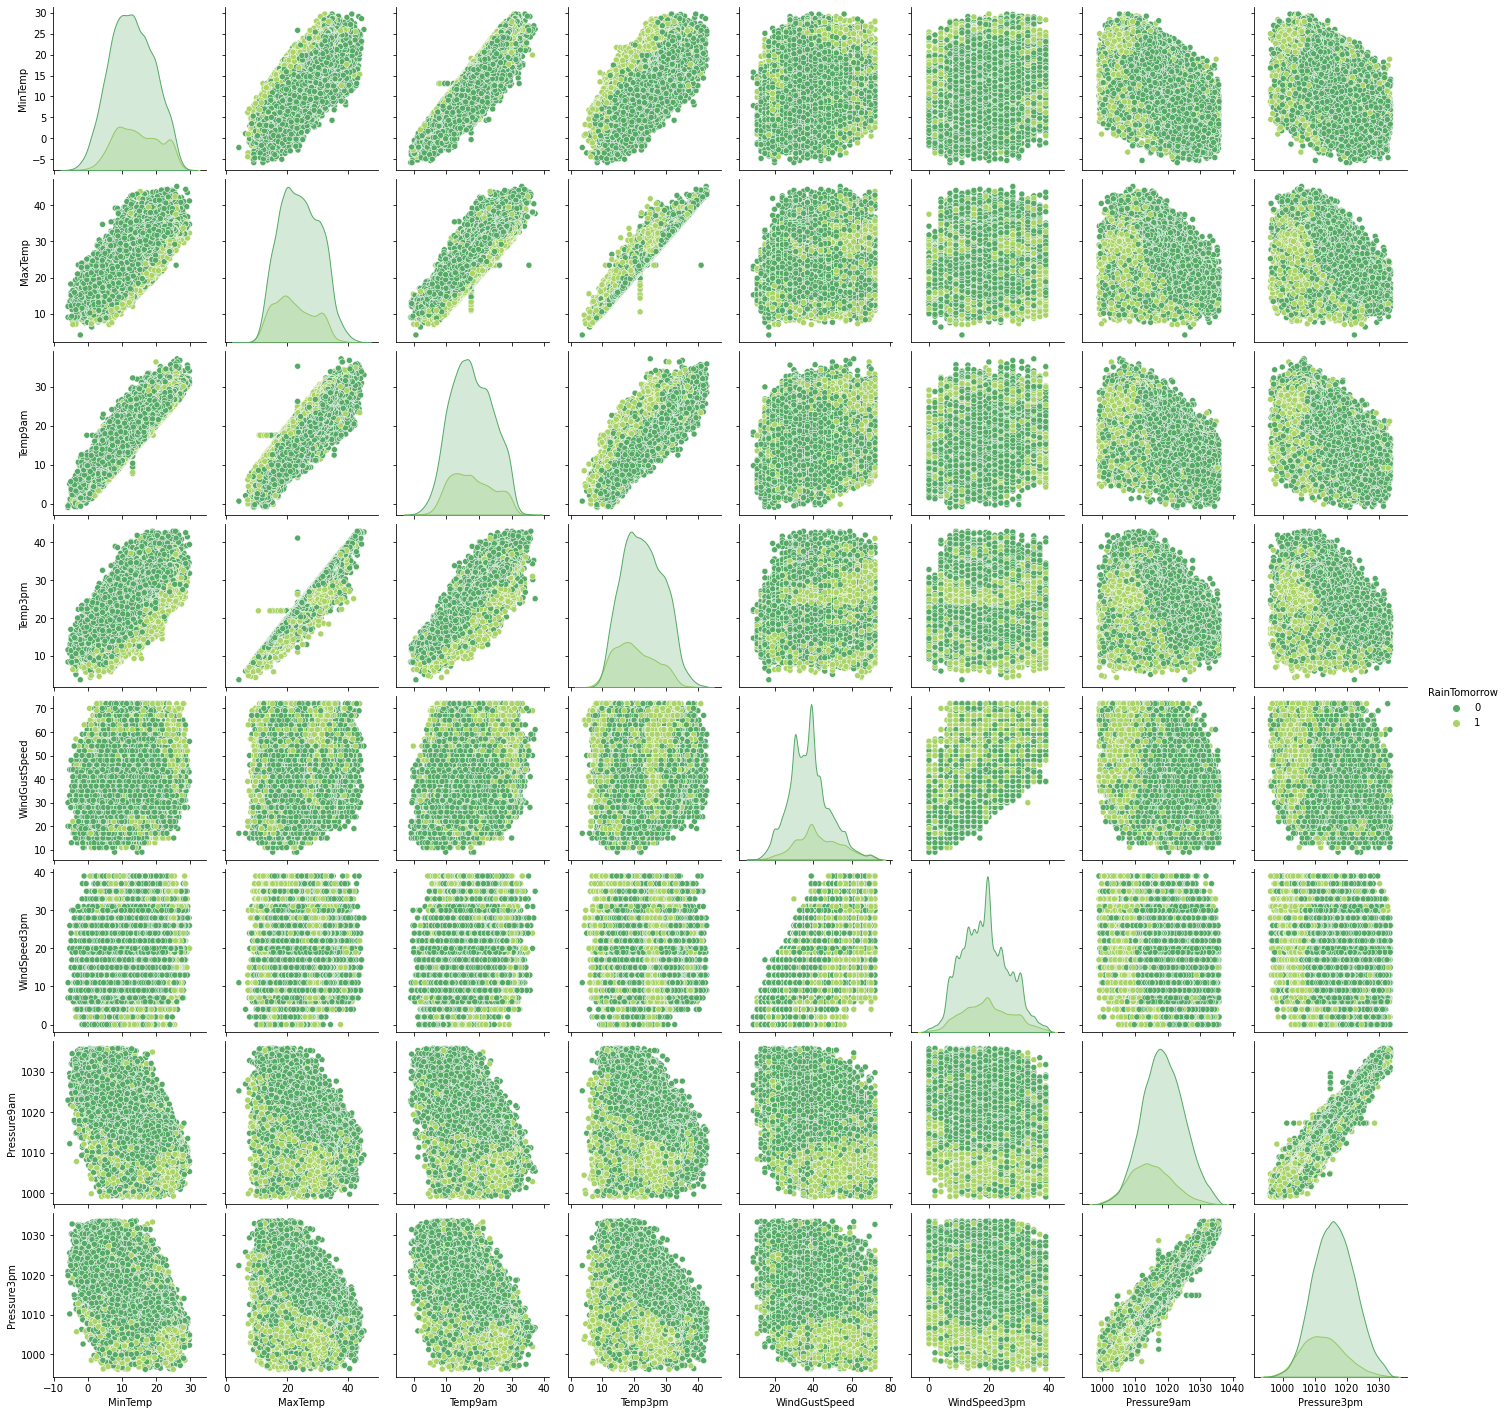

In [ ]:
#Visualisasi korelasi variabel diatas menggunakan scatterplot
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed',
           'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'RainTomorrow']

plt.figure(figsize=(12, 8))
sns.pairplot(df_new[num_var], kind='scatter', hue='RainTomorrow' ,diag_kind='kde', palette='summer')
plt.show()

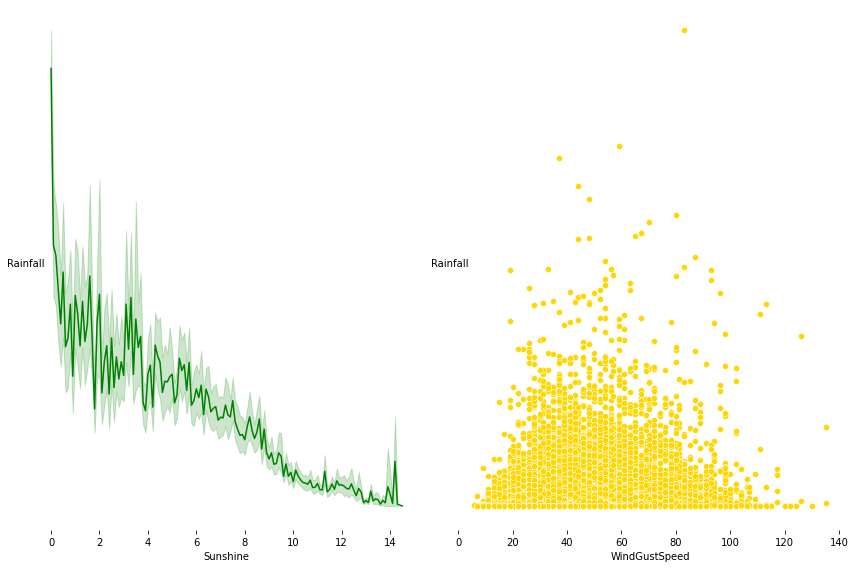

In [ ]:
#Visualisasi hubungan 2 variabel dengan lineplot dan scatterplot
fig=plt.figure(figsize=(12,8),facecolor='white') 
gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

sns.lineplot(data=df,x='Sunshine',y='Rainfall', ax=ax[0],color='green')
sns.scatterplot(data=df,x='WindGustSpeed',y='Rainfall', ax=ax[1],color='gold')

for i in range(2):
    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    for direction in ['top','right','left']:
        ax[i].set_frame_on(False)
        
         
plt.tight_layout()
plt.show()

*   Hubungan antara sunshine dengan rainfall. Semakin tinggi sunshine , rainfall akan turun.
*   Hubungan antara WindGustSpeed dengan rainfall. Tidak ada hubungan yang jelas antara 2 parameter tsb.



#### Find the frequency of data

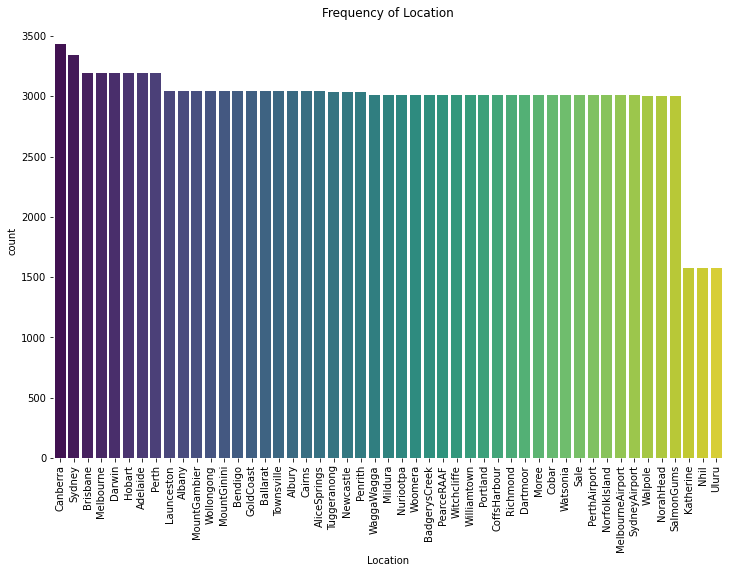

In [ ]:
#Visualisasi frekuensi kolom Location
plt.figure(figsize=(12, 8))

j = sns.countplot(x = 'Location', data = df, order = df['Location'].value_counts().index,
              palette='viridis',linewidth=2)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
j.set_title('Frequency of Location', loc='center')
sns.despine(bottom = True, left = True) 



Top 5 lokasi dengan frekuensi terbanyak :
1.   Canberra
2.   Sydney
3.   Darwin
4.   Melbourne
5.   Perth





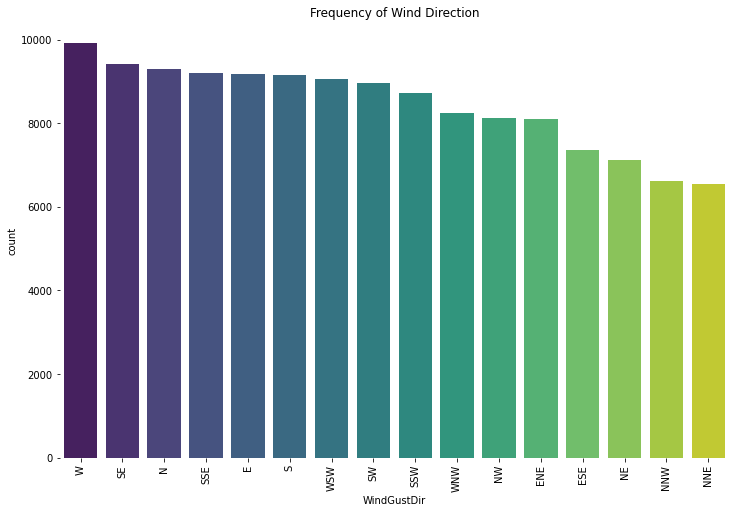

In [ ]:
#Visualisasi frekuensi kolom WindGustDir
plt.figure(figsize=(12, 8))

j = sns.countplot(x = 'WindGustDir', data = df, order = df['WindGustDir'].value_counts().index,
              palette='viridis',linewidth=2)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
j.set_title('Frequency of Wind Direction', loc='center')
sns.despine(bottom = True, left = True) 


Top 5 Arah angin dengan frekuensi terbanyak :
1.   W
2.   SE
3.   N
4.   SSE
5.   E

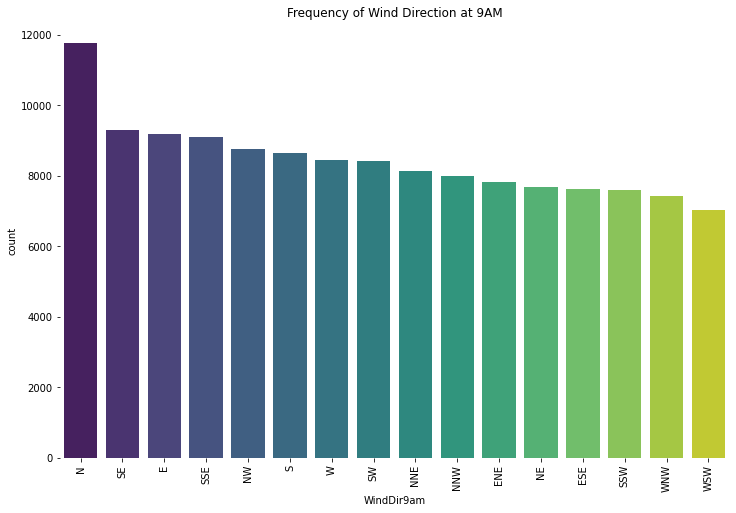

In [ ]:
#Visualisasi frekuensi kolom WindDir9am
plt.figure(figsize=(12, 8))

j = sns.countplot(x = 'WindDir9am', data = df, order = df['WindDir9am'].value_counts().index,
              palette='viridis',linewidth=2)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
j.set_title('Frequency of Wind Direction at 9AM', loc='center')
sns.despine(bottom = True, left = True) 

Top 5 Arah angin pada jam 9 pagi dengan frekuensi terbanyak :
1.   N
2.   SE
3.   E
4.   SSE
5.   NW

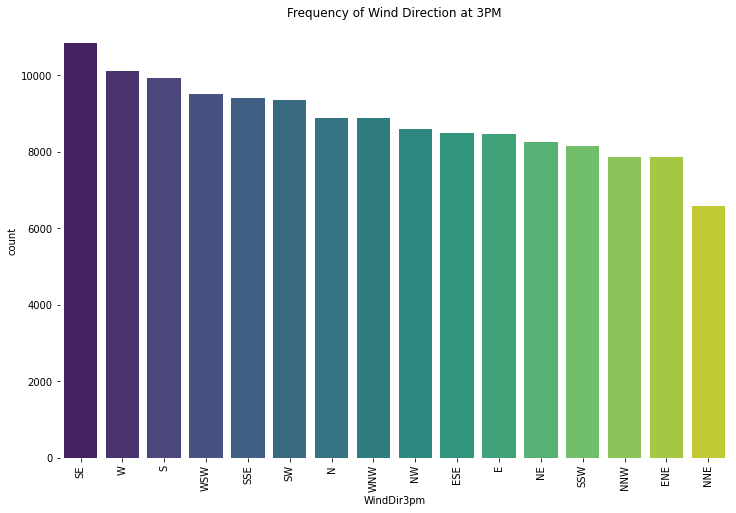

In [ ]:
#Visualisasi frekuensi kolom WindDir3pm
plt.figure(figsize=(12, 8))

j = sns.countplot(x = 'WindDir3pm', data = df, order = df['WindDir3pm'].value_counts().index,
              palette='viridis',linewidth=2)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
j.set_title('Frequency of Wind Direction at 3PM', loc='center')
sns.despine(bottom = True, left = True) 

Top 5 Arah angin pada jam 3 sore dengan frekuensi terbanyak :
1.   SE
2.   W
3.   S
4.   WSW
5.   SSE





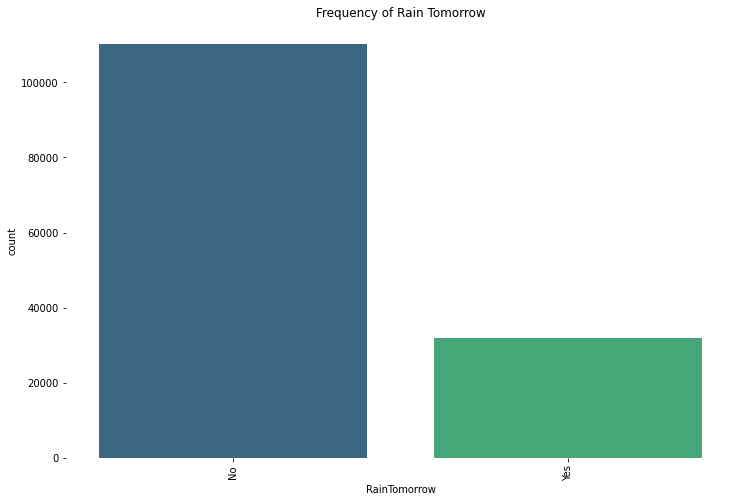

In [ ]:
#Visualisasi frekuensi kolom RainTomorrow
plt.figure(figsize=(12, 8))

j = sns.countplot(x = 'RainTomorrow', data = df, order = df['RainTomorrow'].value_counts().index,
              palette='viridis',linewidth=2)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
j.set_title('Frequency of Rain Tomorrow', loc='center')
sns.despine(bottom = True, left = True) 

In [ ]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

Kita dapat melihat dari chart dan hasil perhitungan, persentase tidak hujan (75,83%) lebih besar daripada hujan (21,91%).





#### Find the distribution of data

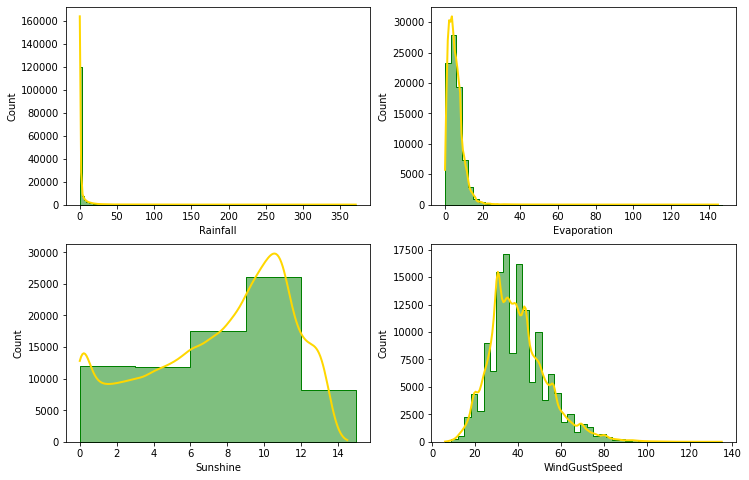

In [ ]:
#Visualisasi cek distribusi data menggunakan histplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

j = sns.histplot(df, x="Rainfall", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
k = sns.histplot(df, x="Evaporation", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 1]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
l = sns.histplot(df, x="Sunshine", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
m = sns.histplot(df, x="WindGustSpeed", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 1]
                , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})

j.lines[0].set_color('gold')
k.lines[0].set_color('gold')
l.lines[0].set_color('gold')
m.lines[0].set_color('gold')

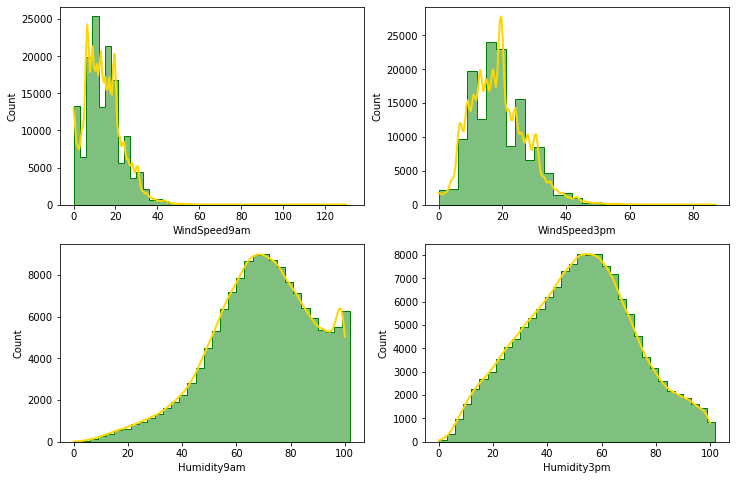

In [ ]:
#Visualisasi cek distribusi data menggunakan histplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

j = sns.histplot(df, x="WindSpeed9am", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
k = sns.histplot(df, x="WindSpeed3pm", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 1]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
l = sns.histplot(df, x="Humidity9am", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
m = sns.histplot(df, x="Humidity3pm", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 1]
                , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})

j.lines[0].set_color('gold')
k.lines[0].set_color('gold')
l.lines[0].set_color('gold')
m.lines[0].set_color('gold')

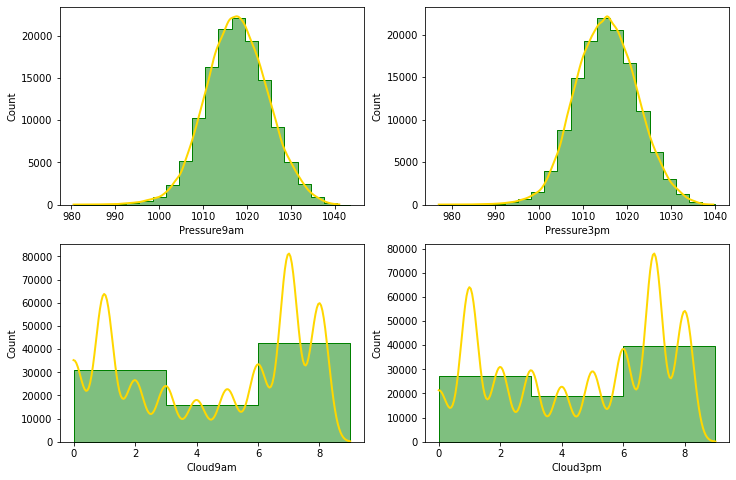

In [ ]:
#Visualisasi cek distribusi data menggunakan histplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

j = sns.histplot(df, x="Pressure9am", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
k = sns.histplot(df, x="Pressure3pm", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 1]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
l = sns.histplot(df, x="Cloud9am", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
m = sns.histplot(df, x="Cloud3pm", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 1]
                , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})

j.lines[0].set_color('gold')
k.lines[0].set_color('gold')
l.lines[0].set_color('gold')
m.lines[0].set_color('gold')

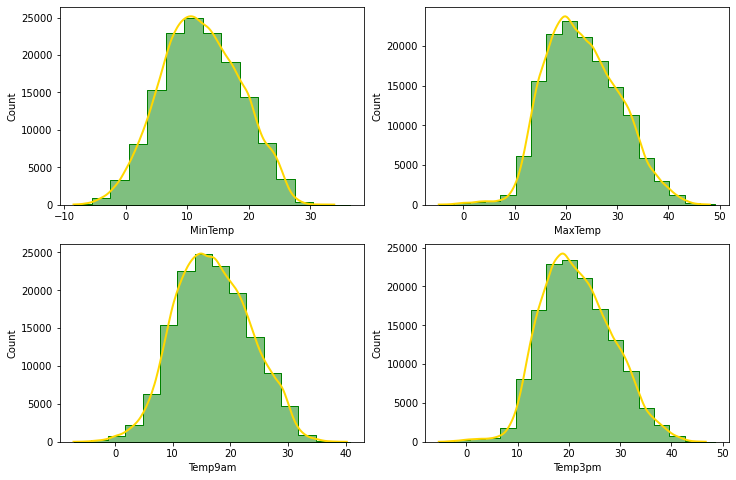

In [ ]:
#Visualisasi cek distribusi data menggunakan histplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

j = sns.histplot(df, x="MinTemp", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
k = sns.histplot(df, x="MaxTemp", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 1]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
l = sns.histplot(df, x="Temp9am", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
m = sns.histplot(df, x="Temp3pm", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 1]
                , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})

j.lines[0].set_color('gold')
k.lines[0].set_color('gold')
l.lines[0].set_color('gold')
m.lines[0].set_color('gold')

Sebagian variabel memiliki chart histplot yang mengecil ke arah kanan/kiri seperti Rainfall, Evaporation, WindSpeed9am, dan WindSpeed3pm sehingga kita akan mencari outlier nya.

#### Find the outliers of data

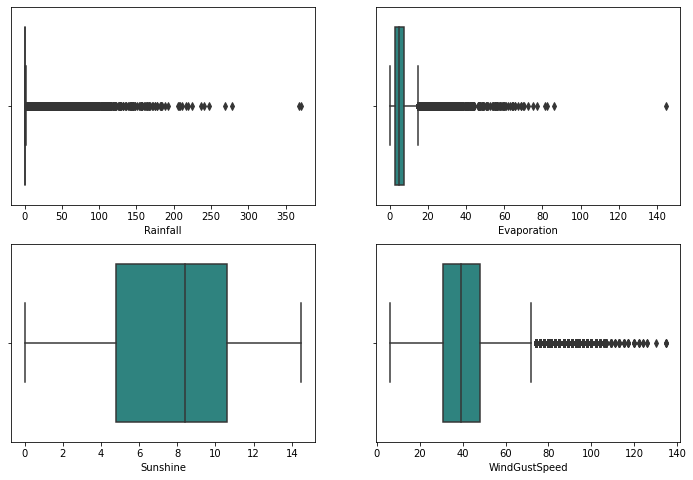

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=df ,x='Rainfall',palette='viridis')
sns.boxplot(ax=axes[0, 1], data=df, x='Evaporation',palette='viridis')
sns.boxplot(ax=axes[1, 0], data=df, x='Sunshine',palette='viridis')
sns.boxplot(ax=axes[1, 1], data=df, x='WindGustSpeed',palette='viridis')

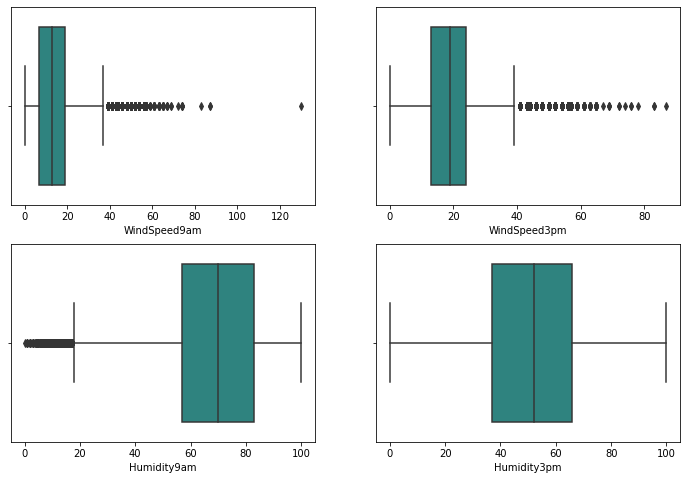

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=df ,x='WindSpeed9am', palette='viridis')
sns.boxplot(ax=axes[0, 1], data=df, x='WindSpeed3pm',palette='viridis')
sns.boxplot(ax=axes[1, 0], data=df, x='Humidity9am',palette='viridis')
sns.boxplot(ax=axes[1, 1], data=df, x='Humidity3pm',palette='viridis')

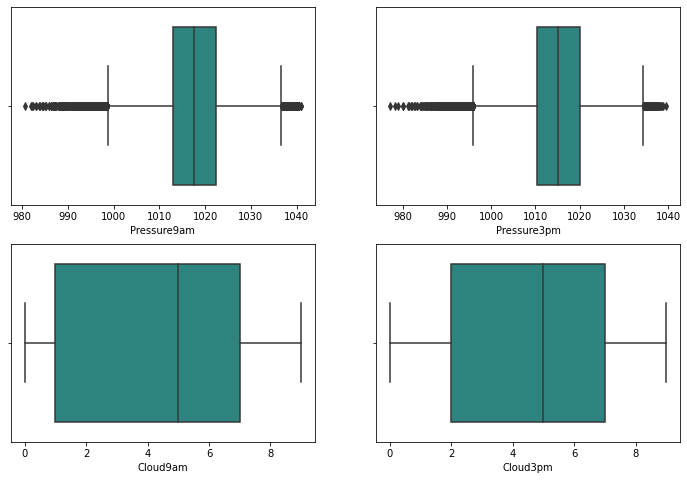

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=df ,x='Pressure9am', palette='viridis')
sns.boxplot(ax=axes[0, 1], data=df, x='Pressure3pm',palette='viridis')
sns.boxplot(ax=axes[1, 0], data=df, x='Cloud9am',palette='viridis')
sns.boxplot(ax=axes[1, 1], data=df, x='Cloud3pm',palette='viridis')

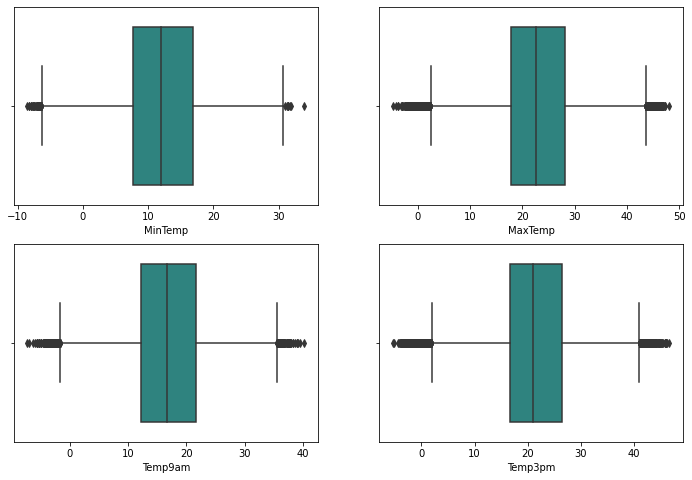

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=df ,x='MinTemp', palette='viridis')
sns.boxplot(ax=axes[0, 1], data=df, x='MaxTemp',palette='viridis')
sns.boxplot(ax=axes[1, 0], data=df, x='Temp9am',palette='viridis')
sns.boxplot(ax=axes[1, 1], data=df, x='Temp3pm',palette='viridis')

Hanya kolom Cloud9am, Cloud3pm, Humidity3pm, Sunshine yang tidak memiliki outlier sisanya memiliki outlier.

In [ ]:
# Mencari nilai outlier pada variabel tsb
IQR_1 = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence_1 = df.Rainfall.quantile(0.25) - (IQR_1 * 1.5)
Upper_fence_1 = df.Rainfall.quantile(0.75) + (IQR_1 * 1.5)

IQR_2 = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence_2 = df.Evaporation.quantile(0.25) - (IQR_2 * 1.5)
Upper_fence_2 = df.Evaporation.quantile(0.75) + (IQR_2 * 1.5)

IQR_3 = df.WindGustSpeed.quantile(0.75) - df.WindGustSpeed.quantile(0.25)
Lower_fence_3 = df.WindGustSpeed.quantile(0.25) - (IQR_3 * 1.5)
Upper_fence_3 = df.WindGustSpeed.quantile(0.75) + (IQR_3 * 1.5)

IQR_4 = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence_4 = df.WindSpeed9am.quantile(0.25) - (IQR_4 * 1.5)
Upper_fence_4 = df.WindSpeed9am.quantile(0.75) + (IQR_4 * 1.5)

IQR_5 = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence_5 = df.WindSpeed3pm.quantile(0.25) - (IQR_5 * 1.5)
Upper_fence_5 = df.WindSpeed3pm.quantile(0.75) + (IQR_5 * 1.5)

IQR_6 = df.Pressure9am.quantile(0.75) - df.Pressure9am.quantile(0.25)
Lower_fence_6 = df.Pressure9am.quantile(0.25) - (IQR_6 * 1.5)
Upper_fence_6 = df.Pressure9am.quantile(0.75) + (IQR_6 * 1.5)

IQR_7 = df.Pressure3pm.quantile(0.75) - df.Pressure3pm.quantile(0.25)
Lower_fence_7 = df.Pressure3pm.quantile(0.25) - (IQR_7 * 1.5)
Upper_fence_7 = df.Pressure3pm.quantile(0.75) + (IQR_7 * 1.5)

IQR_8 = df.MinTemp.quantile(0.75) - df.MinTemp.quantile(0.25)
Lower_fence_8 = df.MinTemp.quantile(0.25) - (IQR_8 * 1.5)
Upper_fence_8 = df.MinTemp.quantile(0.75) + (IQR_8 * 1.5)

IQR_9 = df.MaxTemp.quantile(0.75) - df.MaxTemp.quantile(0.25)
Lower_fence_9 = df.MaxTemp.quantile(0.25) - (IQR_9 * 1.5)
Upper_fence_9 = df.MaxTemp.quantile(0.75) + (IQR_9 * 1.5)

IQR_10 = df.Temp9am.quantile(0.75) - df.Temp9am.quantile(0.25)
Lower_fence_10 = df.Temp9am.quantile(0.25) - (IQR_10 * 1.5)
Upper_fence_10 = df.Temp9am.quantile(0.75) + (IQR_10 * 1.5)

IQR_11 = df.Temp3pm.quantile(0.75) - df.Temp3pm.quantile(0.25)
Lower_fence_11 = df.Temp3pm.quantile(0.25) - (IQR_11 * 1.5)
Upper_fence_11 = df.Temp3pm.quantile(0.75) + (IQR_11 * 1.5)

print('Nilai outlier Rainfall adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_1, upperboundary=Upper_fence_1))
print('Nilai outlier Evaporation adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_2, upperboundary=Upper_fence_2))
print('Nilai outlier WindGustSpeed adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_3, upperboundary=Upper_fence_3))
print('Nilai outlier WindSpeed9am adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_4, upperboundary=Upper_fence_4))
print('Nilai outlier WindSpeed3pm adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_5, upperboundary=Upper_fence_5))
print('Nilai outlier Pressure9am adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_6, upperboundary=Upper_fence_6))
print('Nilai outlier Pressure3pm adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_7, upperboundary=Upper_fence_7))
print('Nilai outlier MinTemp adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_8, upperboundary=Upper_fence_8))
print('Nilai outlier MaxTemp adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_9, upperboundary=Upper_fence_9))
print('Nilai outlier Temp9am adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_10, upperboundary=Upper_fence_10))
print('Nilai outlier Temp3pm adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_11, upperboundary=Upper_fence_11))

Nilai outlier Rainfall adalah < -1.2000000000000002 atau > 2.0
Nilai outlier Evaporation adalah < -4.600000000000001 atau > 14.600000000000001
Nilai outlier WindGustSpeed adalah < 5.5 atau > 73.5
Nilai outlier WindSpeed9am adalah < -11.0 atau > 37.0
Nilai outlier WindSpeed3pm adalah < -3.5 atau > 40.5
Nilai outlier Pressure9am adalah < 998.65 atau > 1036.65
Nilai outlier Pressure3pm adalah < 996.0 atau > 1034.4
Nilai outlier MinTemp adalah < -6.35 atau > 30.849999999999998
Nilai outlier MaxTemp adalah < 2.4499999999999975 atau > 43.65
Nilai outlier Temp9am adalah < -1.6500000000000004 atau > 35.550000000000004
Nilai outlier Temp3pm adalah < 1.9000000000000057 atau > 41.099999999999994


# **Stage 4**

## Data Preprocessing

### Feature Engineering

According to http://www.bom.gov.au .In Australia, the seasons are defined by grouping the calendar months in the following way:

* Summer (1) - the three hottest months December, January and February.
* Autumn (2) - the transition months March, April and May.
* Winter (3) - the three coldest months June, July and August.
* Spring (4) - the three transition months September, October and November.

In [ ]:
#mengekstraksi kolom date menjadi year, month date
df_new = df.copy()
df_new['Date'] = pd.to_datetime(df['Date'])
df_new['Year'] = df_new['Date'].dt.year
df_new['Month'] = df_new['Date'].dt.month
df_new['Day'] = df_new['Date'].dt.day

#menghapus kolom Date
df_new.drop('Date', axis=1, inplace = True)

In [ ]:
#membuat fungsi untuk mengkategorikan season 
def get_season(row):
    if row['Month'] in (12, 1, 2):
        season = 1
    elif row['Month'] in (3, 4, 5):
        season = 2
    elif row['Month'] in (6, 7, 8):
        season = 3   
    else:
        season = 4
    return season

#membuat kolom baru - season
df_new['Season'] = df_new.apply(get_season, axis=1)

In [ ]:
#mengubah nilai kolom raintoday dan raintomorrow menjadi numerik (0,1)
df_new["RainToday"].replace({"Yes": 1, "No": 0}, inplace=True)
df_new["RainTomorrow"].replace({"Yes": 1, "No": 0}, inplace=True)

### Delete Duplicate Data

In [ ]:
print(df_new.duplicated().sum())

0


### Missing Values Handling

In [ ]:
#mencari jumlah nilai yang null/NaN
total = df_new.isnull().sum().sort_values(ascending=False)
percent_1 = df_new.isnull().sum()/df_new.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Sunshine,69835,48.0
Evaporation,62790,43.2
Cloud3pm,59358,40.8
Cloud9am,55888,38.4
Pressure9am,15065,10.4


In [ ]:
#Men-drop nilai nan di kolom yang memiliki missing value di atas 30%
df_new = df_new.dropna(how='any', subset = ["Sunshine","Evaporation","Cloud3pm","Cloud9am",
                                            "RainToday","RainTomorrow"])

In [ ]:
#Mengganti nilai nan untuk data kategori dengan mode dan data numerik dengan median/mean
cateogry_columns=df_new.select_dtypes(include=['object']).columns.tolist()
integer_columns=df_new.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_new:
    if df_new[column].isnull().any():
        if(column in cateogry_columns):
            df_new[column]=df_new[column].fillna(df_new[column].mode()[0])
        else:
            df_new[column]=df_new[column].fillna(df_new[column].median())

In [ ]:
#men-cek jumlah nilai yang null/NaN terakhir
df_new.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
Season           0
dtype: int64>

In [ ]:
df_new.shape

(62294, 26)

### Outlier Values Handling

In [ ]:
#menentukan nilai outlier
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
#mencari jumlah nilai outlier
total = ((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)
percent_1 = ((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).sum()/((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
outlier_data = pd.concat([total, percent_2], axis=1, keys=['Total Outlier', '%'])
outlier_data.head()

,Total Outlier,%
RainToday,13940,22.4
RainTomorrow,13909,22.3
Rainfall,11148,17.9
WindGustSpeed,1392,2.2
Evaporation,1254,2.0


In [ ]:
#mengubah nilai outlier pada kolom yang memiliki outlier dibawah 10% menjadi nan terlebih dahulu

numeric_col = ['Evaporation','Humidity9am','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Pressure9am',
               'Pressure3pm','MaxTemp','MinTemp','Temp3pm']

for x in numeric_col:
    q75,q25 = np.percentile(df_new.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_new.loc[df_new[x] < min,x] = np.nan
    df_new.loc[df_new[x] > max,x] = np.nan

In [ ]:
df_new = df_new.dropna(how='any')

In [ ]:
#men-cek jumlah nilai outlier terakhir
((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)

RainToday        12676
RainTomorrow     12382
Rainfall         10098
Pressure9am          0
Cloud9am             0
Day                  0
Evaporation          0
Humidity3pm          0
Humidity9am          0
Location             0
MaxTemp              0
MinTemp              0
Month                0
Pressure3pm          0
Year                 0
WindSpeed9am         0
Season               0
Sunshine             0
Temp3pm              0
Temp9am              0
WindDir3pm           0
WindDir9am           0
WindGustDir          0
WindGustSpeed        0
WindSpeed3pm         0
Cloud3pm             0
dtype: int64

In [ ]:
df_new.shape

(57254, 26)

### Label Encoding

In [ ]:
#Mengubah variabel kategorik dibawah menjadi values
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

WindGustDir_encode = LabelEncoder()
df_new['WindGustDir']=WindGustDir_encode.fit_transform(df_new['WindGustDir'])

WindDir9am_encode = LabelEncoder()
df_new['WindDir9am']=WindDir9am_encode.fit_transform(df_new['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
df_new['WindDir3pm']=WindDir3pm_encode.fit_transform(df_new['WindDir3pm'])

Location_encode = LabelEncoder()
df_new['Location']=WindDir3pm_encode.fit_transform(df_new['Location'])

In [ ]:
#ubah tipe data kolom RainToday dan RainTomorrow
df_new['RainToday'] = df_new['RainToday'].astype('int')
df_new['RainTomorrow'] = df_new['RainTomorrow'].astype('int')
df_new.shape

(57254, 26)

### Splitting dataset into independent and dependent variable

In [ ]:
#Menentukan dataset independent berdasarkan korelasi (data setelah missing values handling dan outlier handling)
df_new.corr().abs()['RainTomorrow'].sort_values(ascending = False)

RainTomorrow     1.000000
Humidity3pm      0.451984
Sunshine         0.442910
Cloud3pm         0.383835
Cloud9am         0.311344
RainToday        0.300273
Humidity9am      0.268081
Rainfall         0.247170
Pressure9am      0.235166
Pressure3pm      0.211722
WindGustSpeed    0.195773
Temp3pm          0.159602
Evaporation      0.129103
MaxTemp          0.123957
MinTemp          0.106220
WindSpeed9am     0.059565
WindSpeed3pm     0.044593
WindDir9am       0.033270
WindDir3pm       0.032284
WindGustDir      0.030570
Location         0.020862
Year             0.007840
Temp9am          0.006618
Month            0.002123
Season           0.000869
Day              0.000409
Name: RainTomorrow, dtype: float64

In [ ]:
# Memisahkan dataset menjadi predictor dan target
df_X = df_new.drop(['RainTomorrow'],axis=1)
df_y = df_new['RainTomorrow']

X = df_X.astype(float).values
y = df_y.astype(float).values

print("X:", X.shape)
print("y:", y.shape)

X: (57254, 25)
y: (57254,)


### Imbalanced Class Handling 

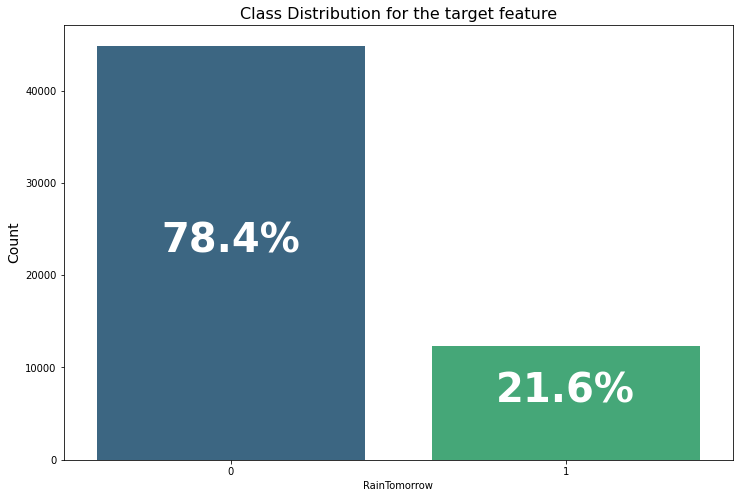

In [ ]:
fig = plt.figure(figsize = (12, 8))
axis = sns.countplot(x = 'RainTomorrow', data = df_new ,palette='viridis');
axis.set_title('Class Distribution for the target feature', size = 16);

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(df_new)*100, 1)}%", 
            ha = 'center', size = 40, rotation = 0,weight = 'bold' ,color = 'white')
    
axis.set_xlabel('Rain Tomorrow', size = 14)
axis.set_ylabel('Count', size = 14);

Kelas dikatakan tidak seimbang ketika kelas minoritas hanya 5-10% dari keseluruhan. 

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='auto')
X, y = oversample.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Splitting Dataset into Training and Test Set


In [ ]:
#memisahkan dataset train dengan test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.25, random_state=42,
                                                 shuffle=True, stratify=y)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (67308, 25)
X_test: (22436, 25)
y_train: (67308,)
y_test: (22436,)


In [ ]:
#menghitung komposisi kelas y_train
pd.value_counts(y_train)

0.0    33654
1.0    33654
dtype: int64

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
MinMax = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Stage 5**

## Build Model with Machine Learning




### Model Selection

In [ ]:
#rf
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_test_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

#logreg
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

#knn
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)  
y_test_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

#svc
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_test_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

#dt
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
y_test_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
89.16,KNN
79.39,Logistic Regression
79.30,Support Vector Machines


### Cross Validation

#### K-Fold Validation

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state=42)
model_rf = rf.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)
y_train_pred = model_rf.predict(X_train)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=cv)
Val_score = scores.mean()
#print("Scores:", scores)
print("Validation Accuracy:", round(Val_score * 100,2),"%")
#print("Standard Deviation:", scores.std())

Validation Accuracy: 93.87 %


In [ ]:
Train_Accuracy = metrics.accuracy_score(y_train, y_train_pred)
Test_Accuracy = metrics.accuracy_score(y_test, y_test_pred)
print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Train Accuracy : 100.0 %
Test Accuracy : 94.54 %


### Feature Selection - Feature Importance

#### Filtering Method - ANOVA

Sebelum feature selection (89744, 25)
Setelah feature selection (89744, 13)
Score of features :
 [6.38277764e+01 1.54907989e+03 1.98433058e+03 5.08781801e+03
 2.31497572e+03 3.20221819e+04 1.18386210e+02 4.84094347e+03
 1.51982626e+02 1.38778307e+02 4.49457301e+02 2.70838774e+02
 1.10577536e+04 3.34149241e+04 7.72701564e+03 6.12834568e+03
 1.62348171e+04 2.68925571e+04 9.23183013e+00 3.33640907e+03
 1.08415356e+04 1.02608382e+01 7.43727256e-01 3.78344530e-01
 1.12833584e-01]
Score of features :
 [1.37383090e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.48485208e-27 0.00000000e+00
 6.82187486e-35 5.19983054e-32 1.66301067e-99 9.14796307e-61
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.37912166e-03 0.00000000e+00
 0.00000000e+00 1.35931350e-03 3.88471819e-01 5.38492110e-01
 7.36941703e-01]


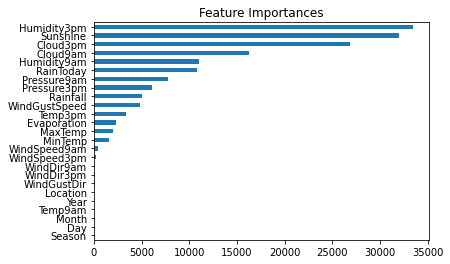

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

#filtering method
filter = SelectKBest(f_classif, k=13)
X_new = filter.fit_transform(X,y)

print('Sebelum feature selection', X.shape)
print('Setelah feature selection', X_new.shape)
print('Score of features :\n', filter.scores_)
print('Score of features :\n', filter.pvalues_)

feat_importances = pd.Series(filter.scores_, index=df_X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [ ]:
#split dataset into training and test yet
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.25, random_state=42)

#build model
rf = RandomForestClassifier()
model_rf = rf.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)
y_train_pred = model_rf.predict(X_train)

Train_Accuracy = metrics.accuracy_score(y_train, y_train_pred)
Test_Accuracy = metrics.accuracy_score(y_test, y_test_pred)
print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Train Accuracy : 100.0 %
Test Accuracy : 94.2 %


### Hyper Parameter

In [ ]:
#split dataset into training and test yet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestClassifier(criterion = "gini",
                                        min_samples_leaf = 1,
                                        min_samples_split = 10,   
                                        n_estimators=100, 
                                        max_features=4, 
                                        oob_score=True, 
                                        random_state=42, 
                                        n_jobs=-1)

model_rf = rf.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)
y_train_pred = model_rf.predict(X_train)

Train_Accuracy = metrics.accuracy_score(y_train, y_train_pred)
Test_Accuracy = metrics.accuracy_score(y_test, y_test_pred)
print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Train Accuracy : 99.3 %
Test Accuracy : 93.12 %


### Evaluation Metrics

#### Training and Test Accuracy

In [ ]:
Train_Accuracy = metrics.accuracy_score(y_train, y_train_pred)
Test_Accuracy = metrics.accuracy_score(y_test, y_test_pred)

print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print("Validation Accuracy:", round(Val_score * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Train Accuracy : 99.3 %
Validation Accuracy: 93.87 %
Test Accuracy : 93.12 %


#### Precision, Recall, and F1-Score

In [ ]:
#performance stats
F1_Score = metrics.f1_score(y_test, y_test_pred,average='macro')
Precision = metrics.precision_score(y_test, y_test_pred,average='macro')
Recall = metrics.recall_score(y_test, y_test_pred,average='macro')
  
print('Precision :', round(Precision * 100,2),"%")  
print('Recall :', round(Recall * 100,2),"%")
print('F1 Score :', round(F1_Score * 100,2),"%")

Precision : 93.24 %
Recall : 93.12 %
F1 Score : 93.11 %


#### Confusion Matrix

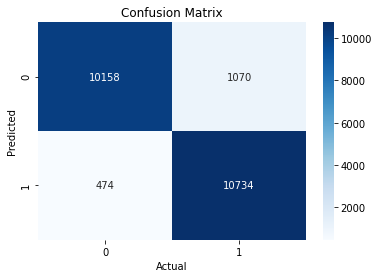

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='', ax=ax, cmap='Blues')
ax.set_xlabel('Actual');ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()